0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


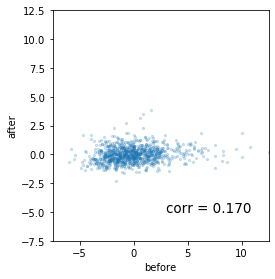

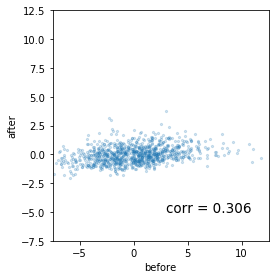

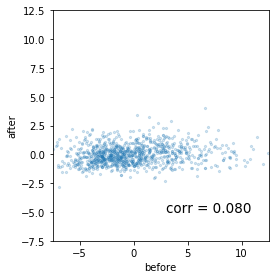

In [1]:
import torch
import numpy
import cv2
import torchvision
import matplotlib
from matplotlib import pyplot as plt

torch.manual_seed(1)

mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)

Y2 = []

for image in 'ABC':
    
    if image == 'A': img = numpy.array(cv2.imread('ILSVRC2012_val_00017700.JPEG'))[...,::-1]/255.0
    if image == 'B': img = numpy.array(cv2.imread('ILSVRC2012_val_00008161.JPEG'))[...,::-1]/255.0
    if image == 'C': img = numpy.array(cv2.imread('ILSVRC2012_val_00026451.JPEG'))[...,::-1]/255.0
        
    X = (torch.FloatTensor(img[numpy.newaxis].transpose([0,3,1,2])*1) - mean) / std

    modelbefore = torchvision.models.vgg16(pretrained=True); modelbefore.eval()
    modelafter = torchvision.models.vgg16(pretrained=True); modelafter.eval()
    
    Y1 = modelbefore(X).data.numpy()
        
    for reinit in range(25):
        print(reinit)

        modelrand = torchvision.models.vgg16(pretrained=False); modelrand.eval()
        modelafter.features[12] = modelrand.features[12]

        Y2 += [modelafter(X).data.numpy()]
        
    y1n,y2n = Y1,numpy.array(Y2).mean(axis=0)
    
    plt.figure(figsize=(4,4))
    plt.subplots_adjust(left=0.2,bottom=0.15,top=0.95,right=0.95)
    plt.scatter(y1n,y2n,alpha=0.2,s=5)
    plt.xlabel('before')
    plt.ylabel('after')
    plt.xlim(-7.5,12.5)
    plt.ylim(-7.5,12.5)
    plt.text(3,-5,'corr = %.3f'%numpy.corrcoef(y1n,y2n)[1,0],fontsize=13.5)
    plt.savefig('out/%s.png'%(image))
